<a href="https://colab.research.google.com/github/davidias0090/validation_and_metrics/blob/main/Davi_Dias_Valida%C3%A7ao_e_m%C3%A9tricas_de_avalia%C3%A7%C3%A3o_Aluguel_de_Carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Análise Exploratória e Pré-processamento</h1>

In [ ]:
import pandas as pd
import plotly.express as px
url ='https://raw.githubusercontent.com/davidias0090/validation_and_metrics/main/emp_automovel10.csv'
df = pd.read_csv(url)
df.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      54025 non-null  float64
 1   anuidade_emprestimo  54025 non-null  float64
 2   anos_casa_propria    54025 non-null  float64
 3   telefone_trab        54025 non-null  int64  
 4   avaliacao_cidade     54025 non-null  float64
 5   score_1              54025 non-null  float64
 6   score_2              54025 non-null  float64
 7   score_3              54025 non-null  float64
 8   score_social         54025 non-null  float64
 9   troca_telefone       54025 non-null  float64
 10  inadimplente         54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


In [ ]:
df.shape

(54025, 11)

In [ ]:
# prompt: histograma avaliacao_cidade por inadimplente usando o ploty

fig = px.histogram(df, x="avaliacao_cidade", color="inadimplente",
                   title="Distribuição de Avaliação da Cidade por Inadimplência")
fig.show()


In [ ]:
px.box(df, x = 'avaliacao_cidade', color = 'inadimplente')

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [ ]:
#Separar features
x = df.drop('inadimplente', axis=1)
#Separar classe
y = df['inadimplente']

In [ ]:
#criar modelo de arvore de decisao
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=5)
#treinar modelo
modelo.fit(x, y)
#calculando acuracia
modelo.score(x, y)

0.9132993984266543

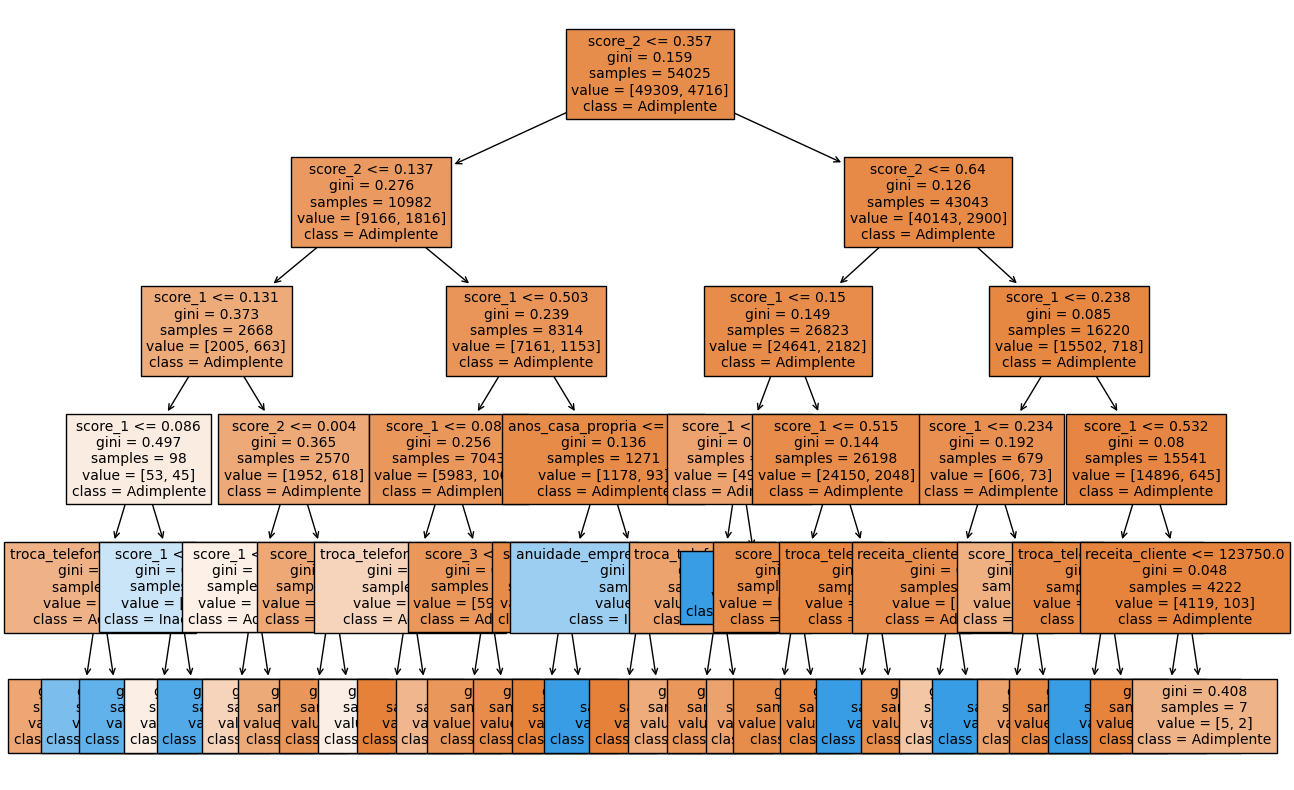

In [ ]:
# prompt: grafico arvore de decisao

from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(modelo,
               ax=ax,
               fontsize=10,
               filled=True,
               feature_names=x.columns,
               class_names=['Adimplente', 'Inadimplente'])
plt.show()


In [ ]:
#separar dados de treino e teste
from sklearn.model_selection import train_test_split
seed = 5
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=seed, stratify=y)

In [ ]:
#criar modelo de arvore de decisao
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=5, random_state = seed)
#treinar modelo
modelo.fit(x_treino, y_treino)
#calculando acuracia
modelo.score(x_teste, y_teste)

0.9114533205004812

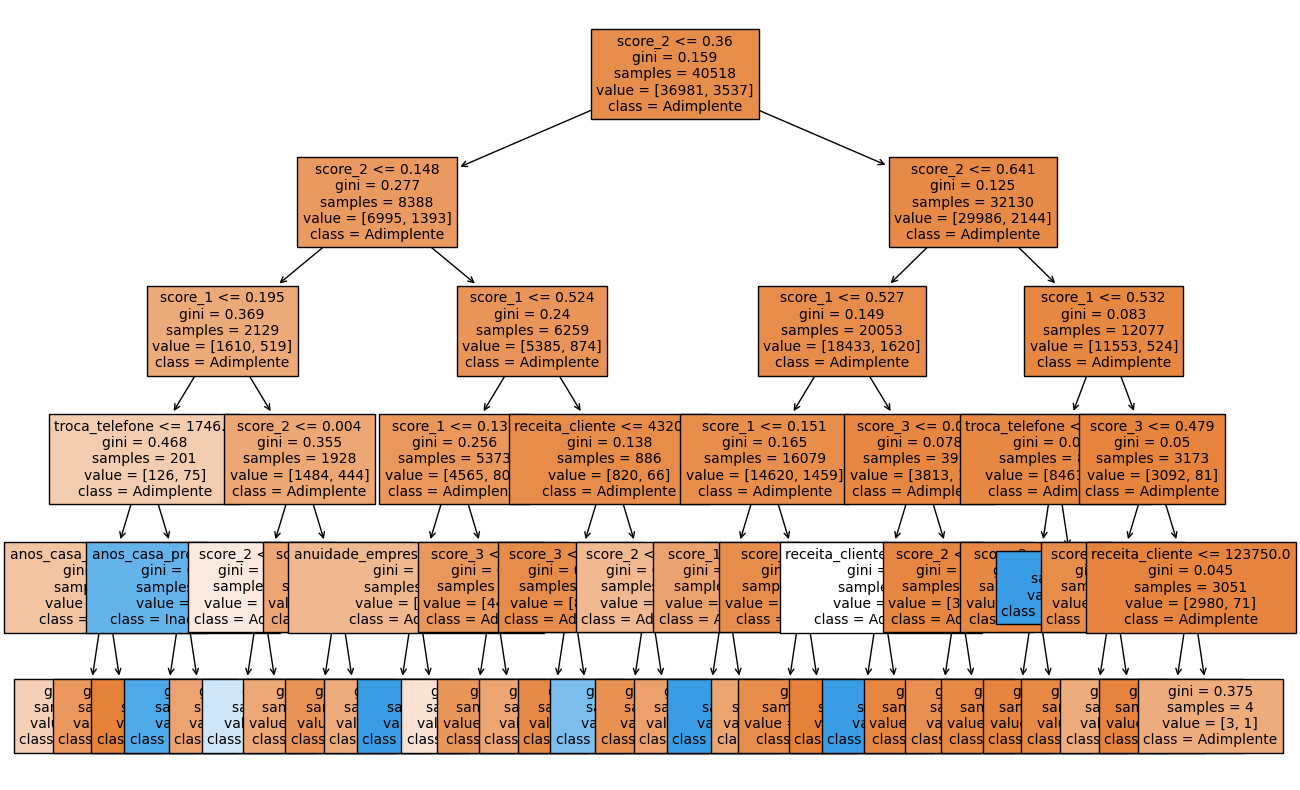

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(modelo,
               ax=ax,
               fontsize=10,
               filled=True,
               feature_names=x.columns,
               class_names=['Adimplente', 'Inadimplente'])
plt.show()

### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

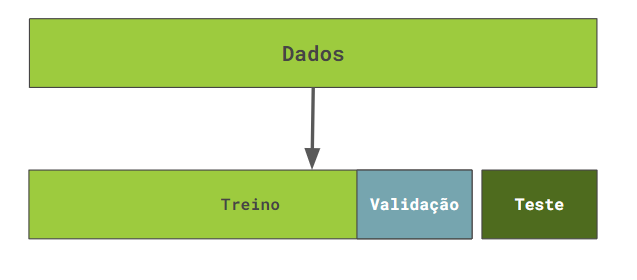

In [ ]:
#separar dados de treino e teste
from sklearn.model_selection import train_test_split
seed = 5
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.15, random_state=seed, stratify=y)
x_treino_novo, x_val, y_treino_novo, y_val = train_test_split(x_treino, y_treino, test_size=0.15, random_state=seed, stratify=y_treino)

In [ ]:
#criar modelo de arvore de decisao
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=5, random_state = seed)
#treinar modelo
modelo.fit(x_treino_novo, y_treino_novo)
#calculando acuracia
modelo.score(x_val, y_val)

0.9115982000290318

### Avaliando o modelo

In [ ]:
#metricas
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score
previsoes = modelo.predict(x_val)
print("Acuracia do modelo :",accuracy_score(y_val, previsoes))
print("Recall do modelo : ",recall_score(y_val, previsoes))
print("Precisão do modelo :", precision_score(y_val, previsoes))
print("F1_Score do modelo :",f1_score(y_val, previsoes))


Acuracia do modelo : 0.9115982000290318
Recall do modelo :  0.0016638935108153079
Precisão do modelo : 0.1
F1_Score do modelo : 0.0032733224222585926


## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

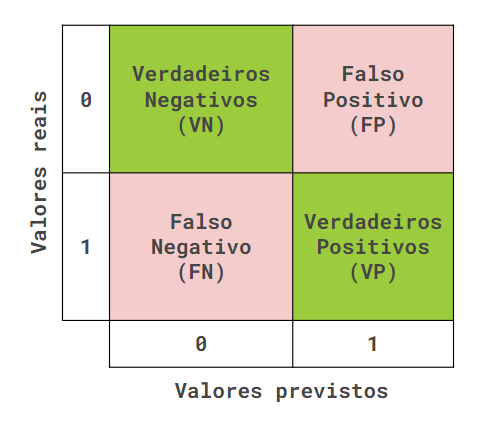

In [ ]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_val, previsoes)
print(matriz)

[[6279    9]
 [ 600    1]]


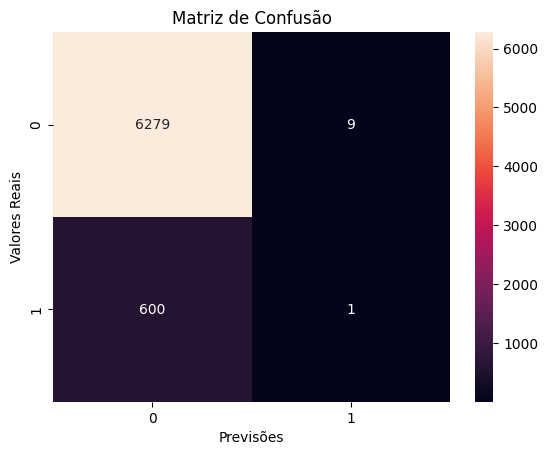

In [ ]:
import seaborn as sns

sns.heatmap(matriz, annot=True, fmt='d')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

#### Acurácia


É a métrica mais comum e básica em problemas de classificação. É utilizada para medir a proporção de dados previstos corretamente pelo modelo em relação ao total dos dados. Essa métrica é útil quando as classes da variável alvo estão balanceadas, ou seja, quando existe uma quantidade equilibrada de dados para cada classe e uma importância equivalente de classificação entre as categorias. Como exemplo de utilização, temos o reconhecimento de dígitos manuscritos. Podemos utilizar imagens de caracteres de letras e números para treinar um modelo de classificação para identificar corretamente a escrita. Como cada letra ou número não tem uma importância maior do que as demais, a acurácia se torna uma boa métrica para medir a capacidade do modelo em classificar corretamente os dígitos.

Abaixo, podemos analisar o cálculo da acurácia a partir da matriz de confusão. Ela é calculada somando os acertos do modelo (VN + VP) e dividindo por todos os acertos e erros (VP+VN+FP+FN).

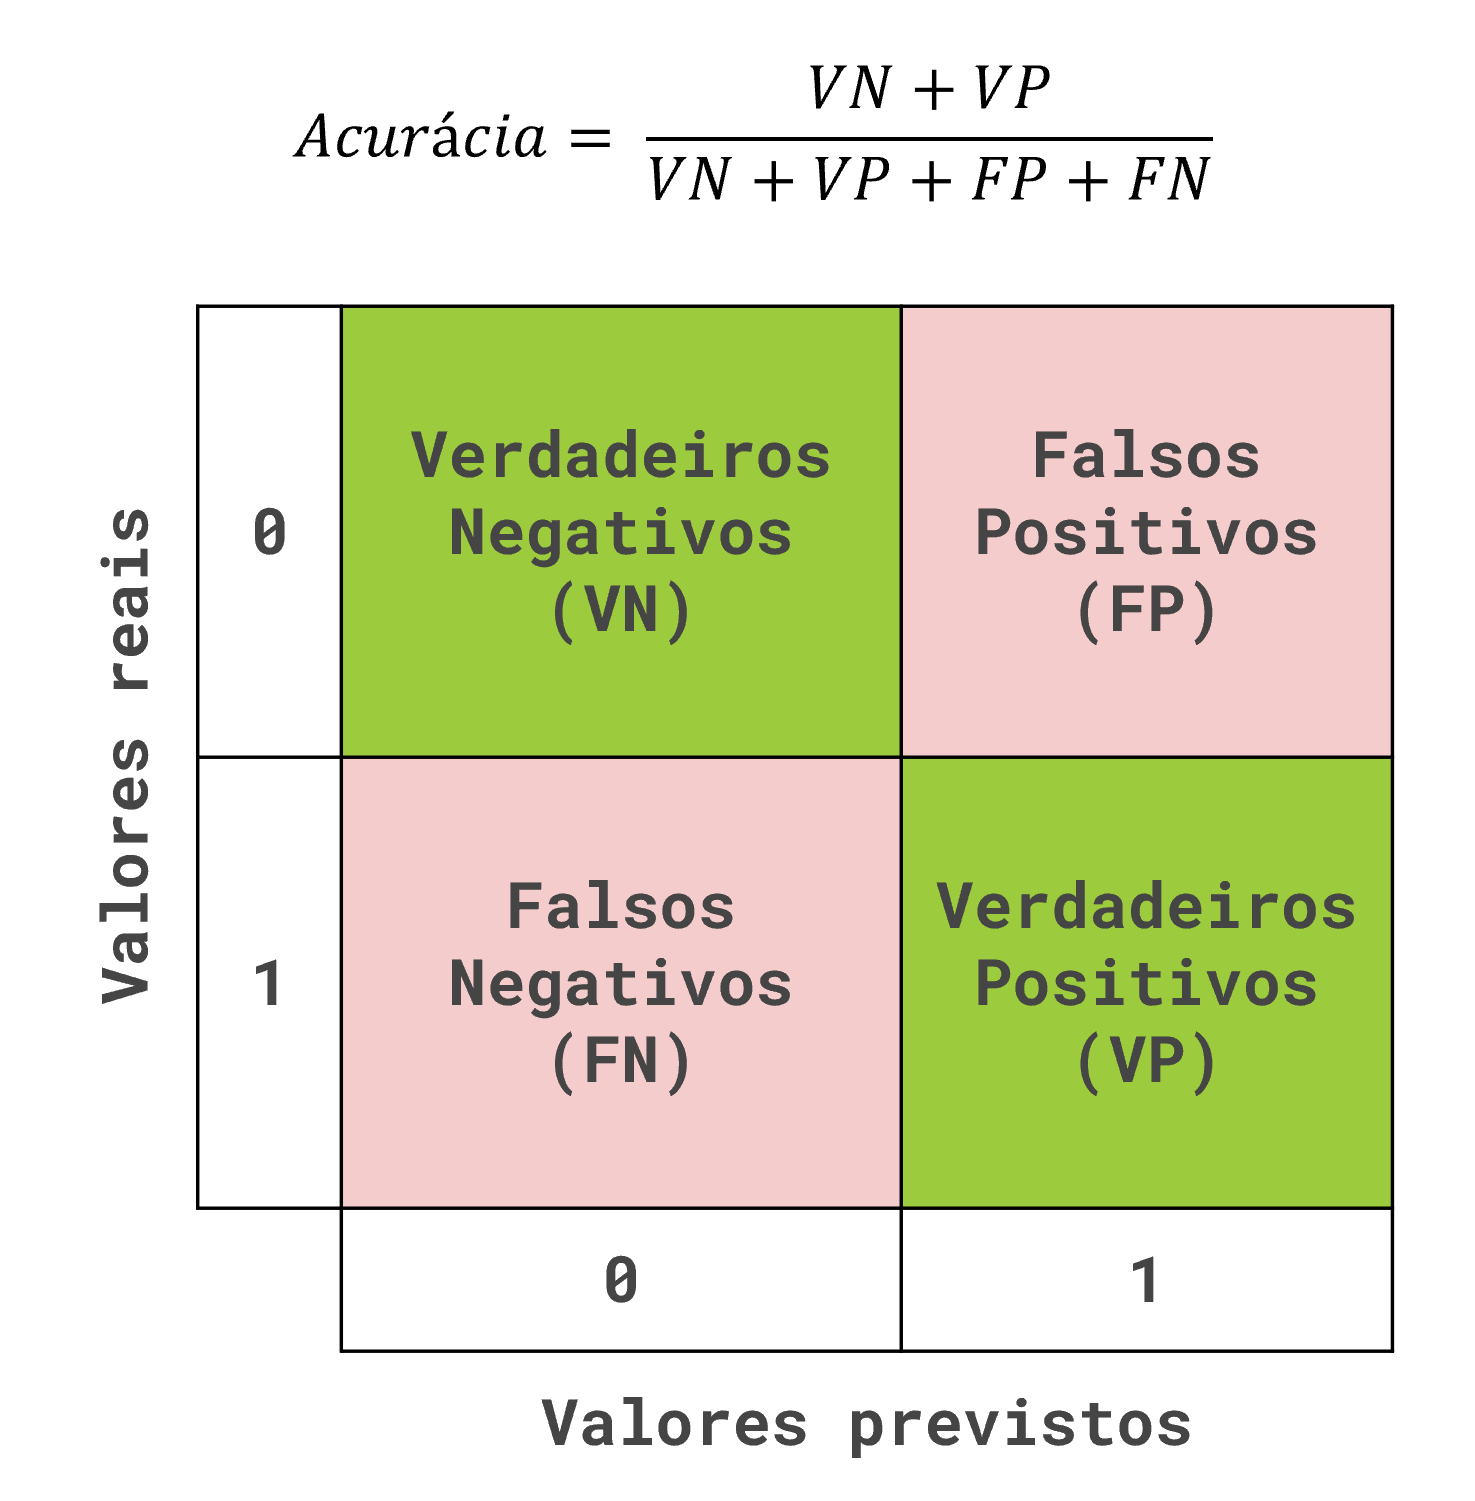

Revocação (recall)
Mede a proporção de dados positivos que foram corretamente identificados pelo modelo, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados positivos como negativos. É usada quando o risco ou custo de classificar falsos negativos é alto. Por exemplo, em casos de diagnóstico de doenças graves, em que é fundamental detectar corretamente a presença da doença.

Abaixo podemos constatar o cálculo do recall a partir da matriz de confusão. O recall só leva em consideração os valores positivos reais, ou seja, os valores da segunda linha da matriz. Ele é calculado a partir da divisão entre Verdadeiros Positivos (VP) pela soma de todos os positivos reais (VP + FN):

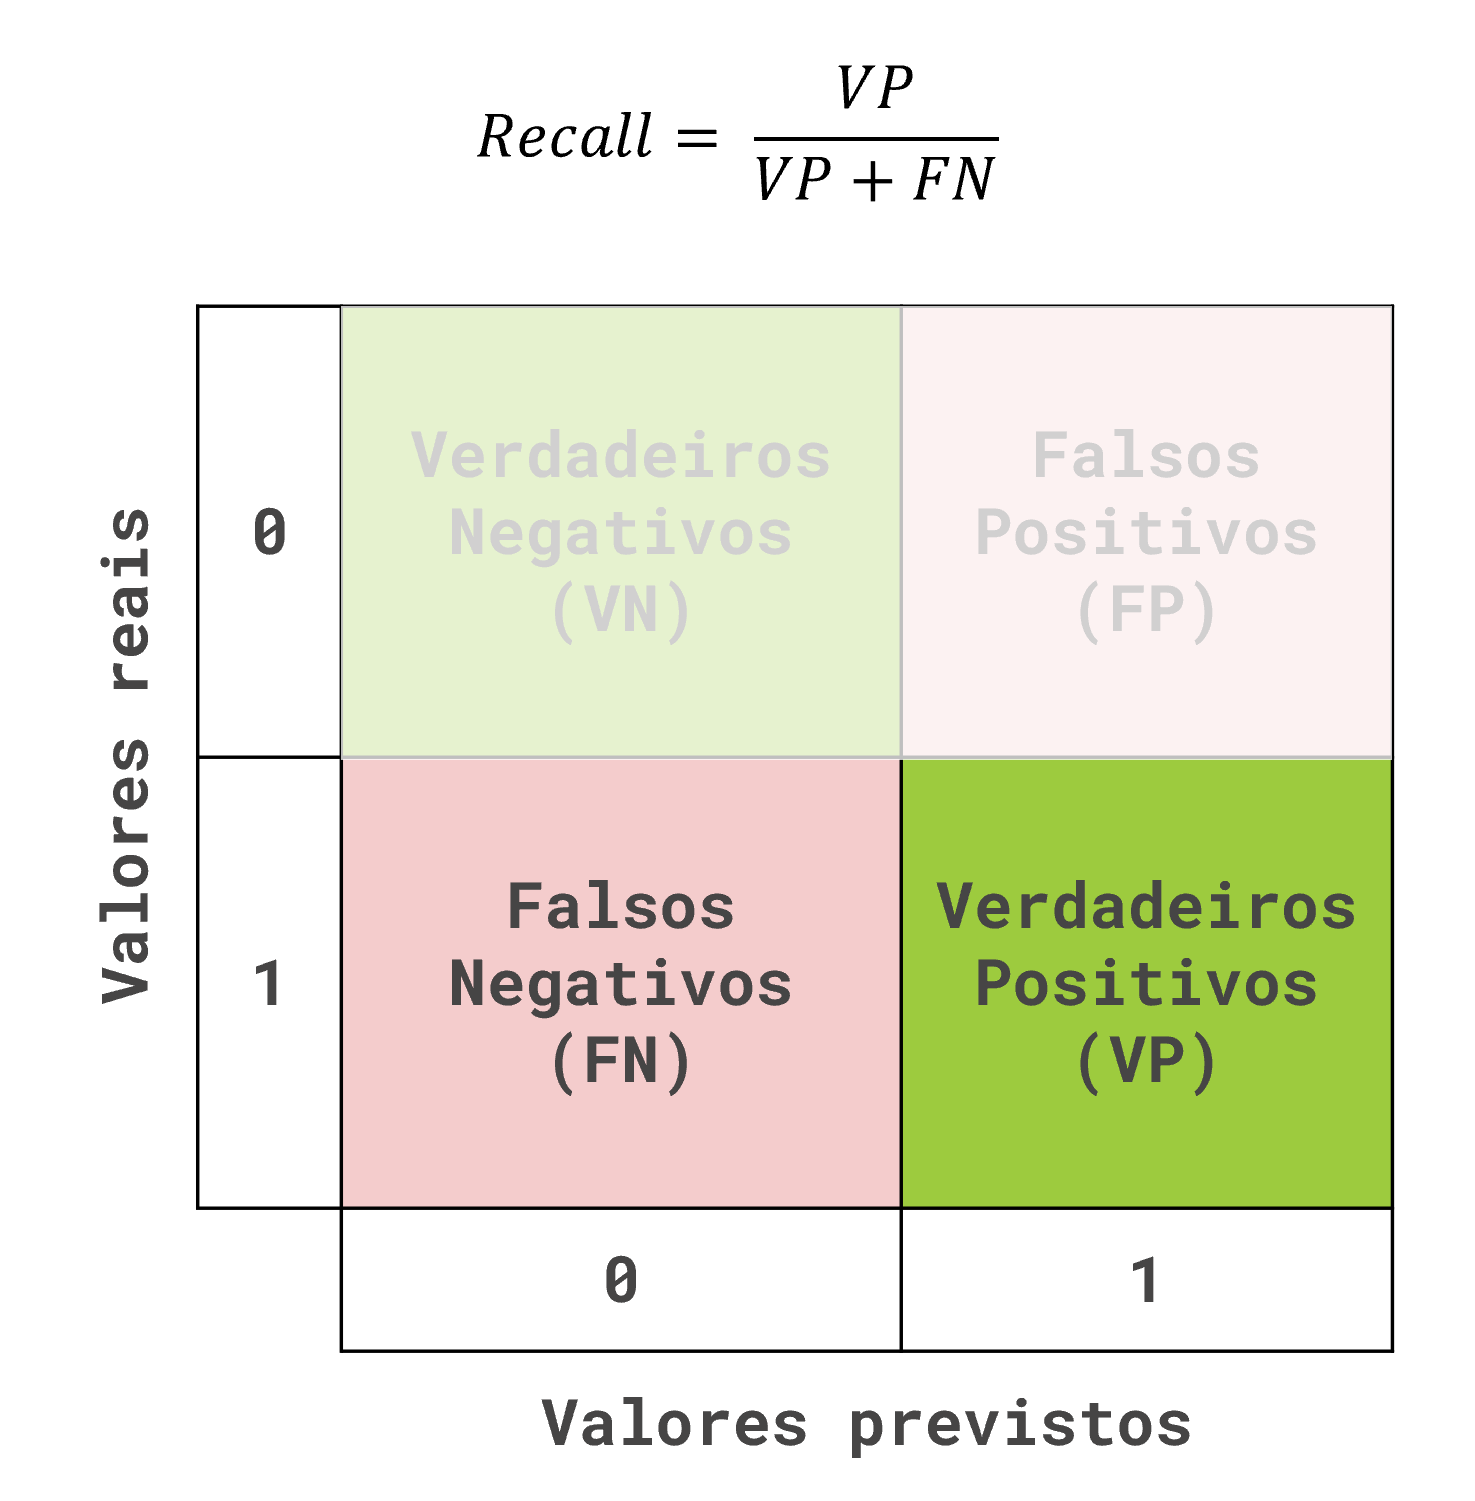




#### Precisão


Mede a proporção de dados classificados como positivos que são realmente positivos, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados negativos como positivos. É usada quando o risco ou custo de classificar falsos positivos é alto, por exemplo em casos de seleção de ações no mercado financeiro, onde o importante é selecionar ações que tenham grande probabilidade de retorno, abaixando a quantidade de ações ruins (falsos positivos) mesmo que outras boas ações não tenham sido detectadas pelo modelo (falso negativo). A precisão também é importante no exemplo de detecção de doenças, onde queremos evitar que pacientes saudáveis sejam erroneamente classificados como doentes.

Abaixo podemos analisar o cálculo da precisão a partir da matriz de confusão. A precisão só leva em consideração os valores positivos previstos pelo modelo, ou seja, os valores da segunda coluna da matriz. Ela é calculada a partir da divisão entre Verdadeiros Positivos (VP) pela soma de todos os positivos previstos (VP + FP):

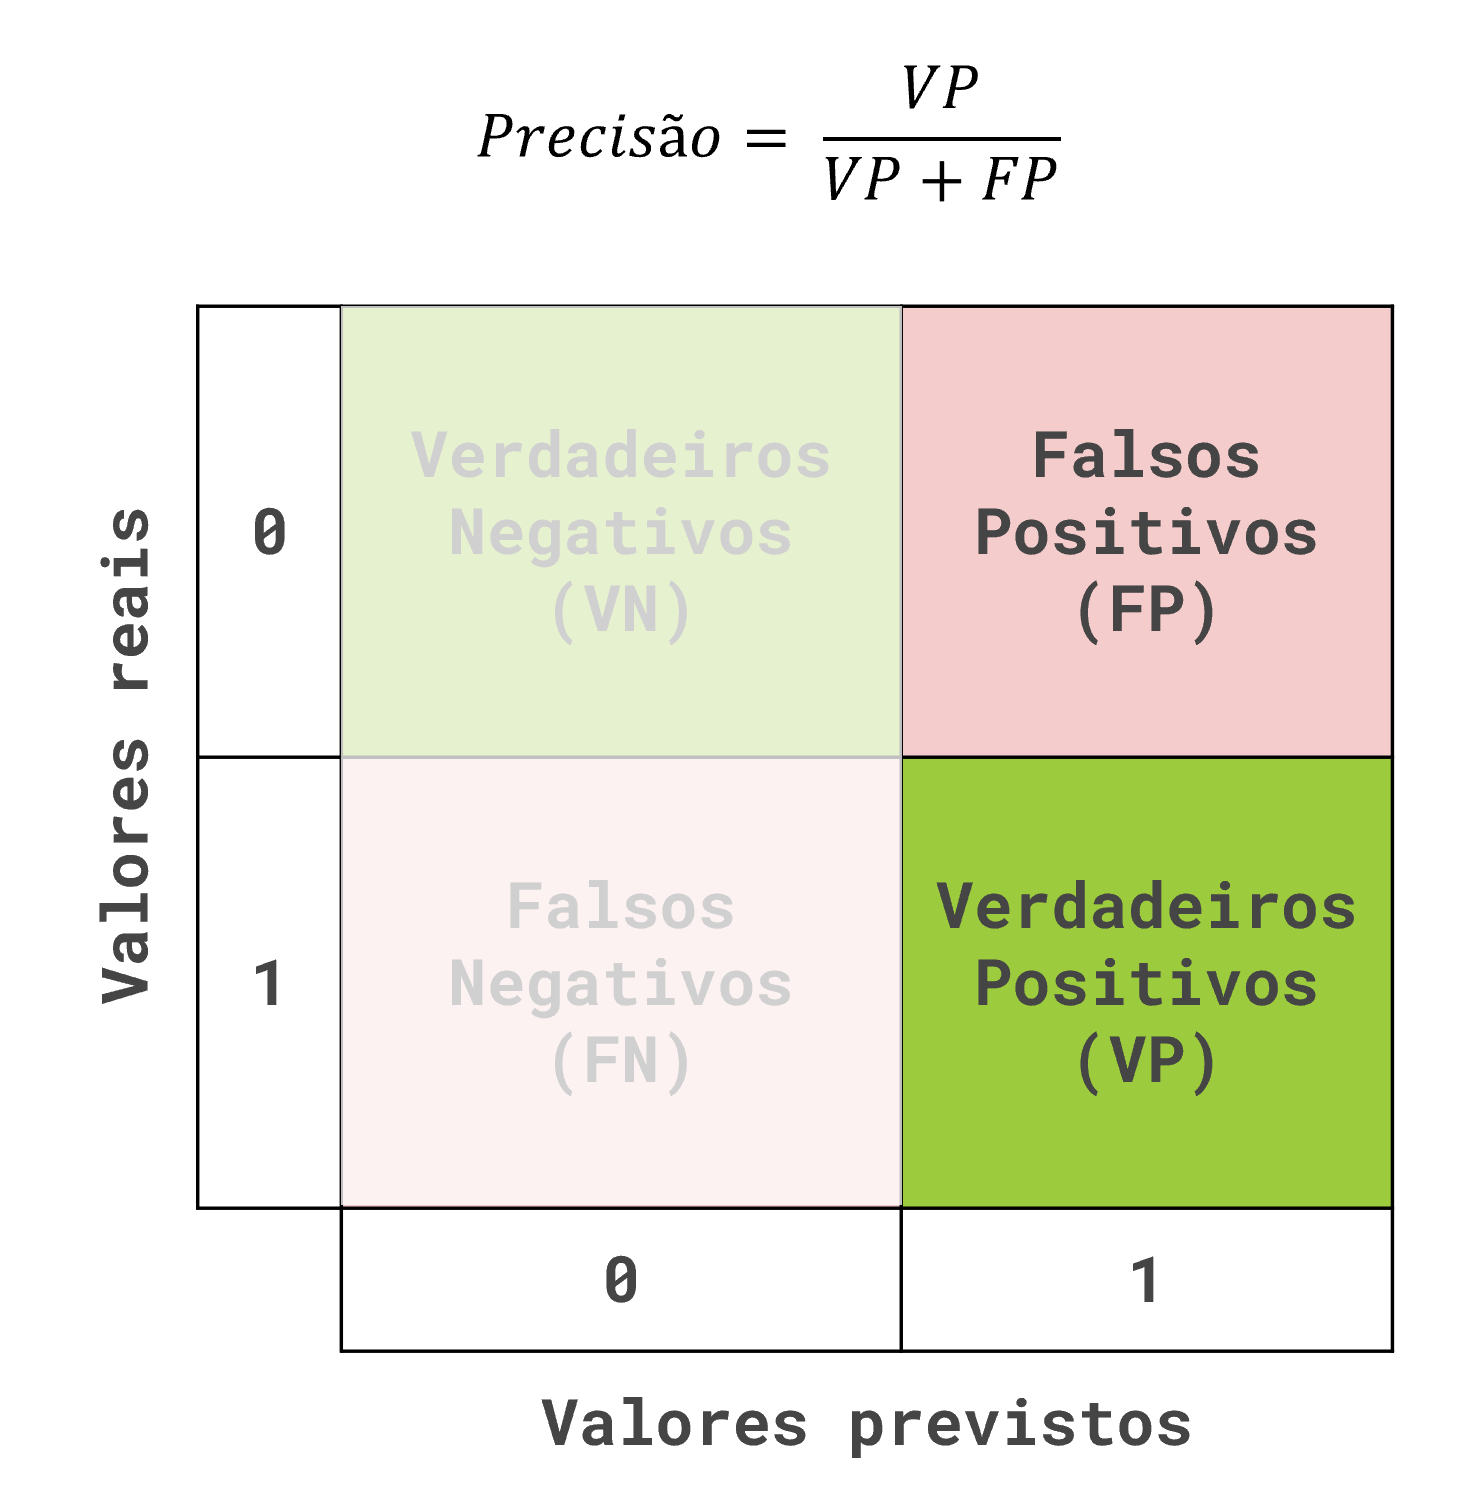

#### F1-Score


Fornece um equilíbrio entre o recall e a precisão, sendo útil quando as classes da variável alvo estão desbalanceadas, ou seja, quando há uma quantidade de dados muito diferente para cada classe. Além disso, é aplicável quando o risco ou custo de falsos positivos e de falsos negativos é alto simultaneamente. Em casos de detecção de tumores em pacientes, é preciso ter um equilíbrio entre evitar erros na detecção de tumores quando a pessoa realmente os possui e evitar erros ao informar que uma pessoa possui um tumor quando na realidade ela não possui.

O cálculo do F1-Score é feito a partir da média harmônica entre a precisão e o recall. Portanto, equivale a 2 vezes a precisão pelo recall, dividido pela soma entre a precisão e o recall:

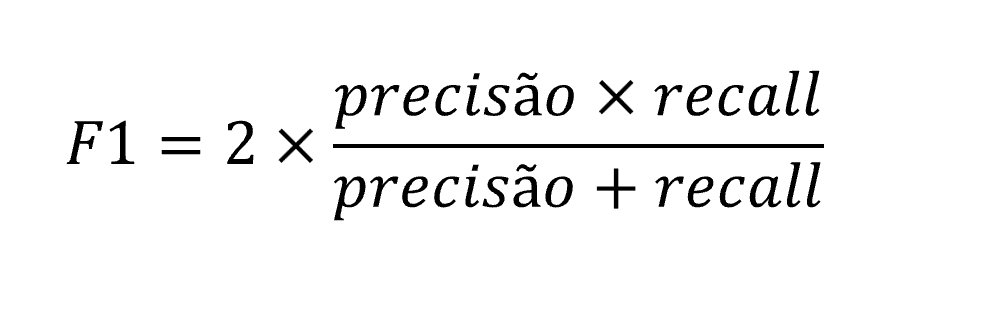

A escolha da métrica de classificação adequada depende do problema que está sendo resolvido e de cada cenário. Nos casos em que as classes estão balanceadas e possuem importância semelhante, a acurácia pode ser uma boa métrica inicial. Porém, quando as classes estão desequilibradas ou os erros têm custos diferentes, métricas como precisão, recall e f1-score são mais indicadas.

### Curva ROC

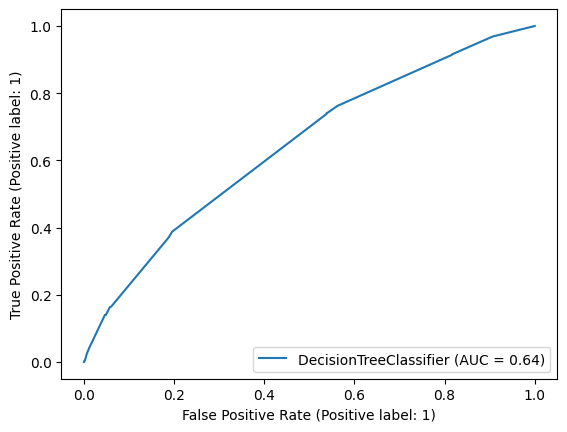

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(modelo, x_val, y_val)
plt.show()

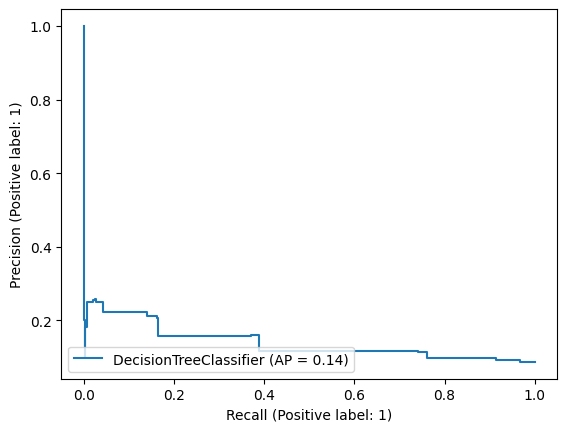

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(modelo, x_val, y_val)

### Curva de precisão x recall

### Relatório de métricas

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, modelo.predict(x_val)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6288
           1       0.10      0.00      0.00       601

    accuracy                           0.91      6889
   macro avg       0.51      0.50      0.48      6889
weighted avg       0.84      0.91      0.87      6889



## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o resultado seja muito dependente dessa divisão dos dados e pode ser que, de forma aleatória, o padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a **validação cruzada**, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Será gerado um modelo para cada uma dessas divisões e a avaliação de desempenho será feita tirando a média da métrica de cada modelo. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitiga o problema da escolha dos dados.

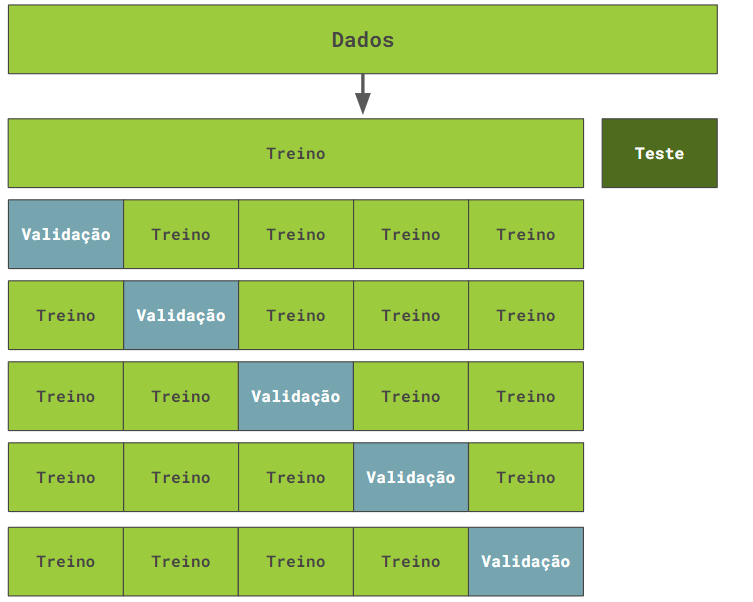

In [ ]:
from sklearn.model_selection import KFold, cross_validate

In [ ]:
#Separar features
x = df.drop('inadimplente', axis=1)
#Separar classe
y = df['inadimplente']

array([0.01319797, 0.00530223, 0.00214823, 0.        , 0.00107181])

### Validação cruzada com recall

In [ ]:
#criar modelo de arvore de decisao
from sklearn.tree import DecisionTreeClassifier
seed = 5
modelo = DecisionTreeClassifier(max_depth=5)

#divisao dos dados de treino e validacao
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

#validacao cruzada
resultados = cross_validate(modelo, x, y, cv=kf, scoring='recall')
test_score = resultados['test_score']

In [ ]:
def intervalo_de_confianca(resultados):
  media =resultados.mean()
  desvio =resultados.std()
  print(f"intervalo de Confiança : [{max(media - 2*desvio,0)}, {min(media + 2*desvio,1)}]")



In [ ]:
intervalo_de_confianca(test_score)

intervalo de Confiança : [0, 0.013881759454416711]


In [ ]:
#criar modelo de arvore de decisao
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
seed = 5
modelo = SVC()

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=seed, stratify=y)

#divisao dos dados de treino e validacao
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

#validacao cruzada
resultados = cross_validate(modelo, x_treino, y_treino, cv=kf, scoring='recall')
test_score = resultados['test_score']

intervalo_de_confianca(test_score)

modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)
print(classification_report(y_teste, previsoes))
print(f"Recall do modelo final:{recall_score(y_teste, previsoes)}")


intervalo de Confiança : [0.0, 0.0]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12328
           1       0.00      0.00      0.00      1179

    accuracy                           0.91     13507
   macro avg       0.46      0.50      0.48     13507
weighted avg       0.83      0.91      0.87     13507

Recall do modelo final:0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Estratificando os dados

##Balanceamento dos dados

###Oversampling

In [1]:
 from imblearn.over_sampling import SMOTE
seed = 5
#Separar features
x = df.drop('inadimplente', axis=1)
#Separar classe
y = df['inadimplente']
#Balanceamento
smote = SMOTE(random_state=seed)
x, y = smote.fit_resample(x, y)

NameError: name 'df' is not defined

In [ ]:
y.value_counts(normalize=True)

In [ ]:
#criar modelo de arvore de decisao
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
seed = 5
modelo = DecisionTreeClassifier(max_depth=5)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_smote, y_smote, test_size=0.25, random_state=seed, stratify=y)

#divisao dos dados de treino e validacao
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

#validacao cruzada
resultados = cross_validate(modelo, x_treino, y_treino, cv=kf, scoring='recall')
test_score = resultados['test_score']

intervalo_de_confianca(test_score)

modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)
print(classification_report(y_teste, previsoes))
print(f"Recall do modelo final:{recall_score(y_teste, previsoes)}")

##UnderSampling

In [ ]:
from imblearn.under_sampling import NearMiss
seed = 5
#Separar features
x = df.drop('inadimplente', axis=1)
#Separar classe
y = df['inadimplente']
#Balanceamento
near = NearMiss(version = 3)
x, y = near.fit_resample(x, y)

In [ ]:
y.value_counts(normalize=True)

,proportion
inadimplente,
0,0.5
1,0.5


In [ ]:
#criar modelo de arvore de decisao
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
seed = 5
modelo = DecisionTreeClassifier(max_depth=5)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=seed, stratify=y)

#divisao dos dados de treino e validacao
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

#validacao cruzada
resultados = cross_validate(modelo, x_treino, y_treino, cv=kf, scoring='recall')
test_score = resultados['test_score']

intervalo_de_confianca(test_score)

modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)
print(classification_report(y_teste, previsoes))
print(f"Recall do modelo final:{recall_score(y_teste, previsoes)}")

intervalo de Confiança : [0.5542177804938098, 0.7434400240275625]
              precision    recall  f1-score   support

           0       0.65      0.51      0.57      1179
           1       0.59      0.72      0.65      1179

    accuracy                           0.61      2358
   macro avg       0.62      0.61      0.61      2358
weighted avg       0.62      0.61      0.61      2358

Recall do modelo final:0.720949957591179


In [ ]:
from imblearn.under_sampling import NearMiss
seed = 5
#Separar features
x = df.drop('inadimplente', axis=1)
#Separar classe
y = df['inadimplente']
#Balanceamento
NearMiss(version = 3)
x, y = near.fit_resample(x, y)

#criar modelo de arvore de decisao
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
seed = 5
modelo = DecisionTreeClassifier(max_depth=5)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=seed, stratify=y)

#divisao dos dados de treino e validacao
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

#Pipeline
pipeline = Pipeline([('balanceamento', NearMiss(version = 3)), ('modelo', modelo)])

#validacao cruzada
resultados = cross_validate(pipeline, x, y, cv=kf, scoring='recall')
test_score = resultados['test_score']

intervalo_de_confianca(test_score)

modelo.fit(x_treino, y_treino)
previsoes = modelo.predict(x_teste)
print(classification_report(y_teste, previsoes))
print(f"Recall do modelo final:{recall_score(y_teste, previsoes)}")

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning:

The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning:

The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning:

The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.

/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning:

The number of the samples to be selected is large

intervalo de Confiança : [0, 0.8184679380193367]
              precision    recall  f1-score   support

           0       0.65      0.51      0.57      1179
           1       0.59      0.72      0.65      1179

    accuracy                           0.61      2358
   macro avg       0.62      0.61      0.61      2358
weighted avg       0.62      0.61      0.61      2358

Recall do modelo final:0.720949957591179
